# COGS 108 - ECE Pathways to Success: Transfer vs. First-Year Academic Outcomes Among Electrical and Computer Engineering Students


# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ X ] NO - keep private

# Names

- Yolanda Liu
- Yong Quan Neo
- Natalie Reyes
- Scott Miller

# Abstract
In this project, we analyzed the differences in academic outcomes between first-year and transfer students in UCSD’s  Electrical and Computer Engineering (ECE) department who entered between 2012 and 2016. We used academic performance metrics like GPA at time of graduation, time to graduation, retention rates, and overall graduation rates, while considering factors such as course load and course difficulty.

Our findings indicate that transfer students generally take more time to graduate and are less likely to graduate even when allotted additional time to complete their degree. In contrast, first-year students tend to have a higher retention rate and are more likely to complete their degree. These findings highlight potential difficulties faced by transfer students that may hinder their ability to complete their degree. Though many of these difficulties cannot be effectively measured and are largely subjective to each transfer student’s experience, our findings still suggest the need for specific academic support to improve their college career.



# Research Question

How do academic outcomes (GPA at time of graduation, time to graduation, & whether or not a student graduates from UCSD entirely) differ between first-year and transfer students at UCSD in the ECE department who entered between 2012-2016, considering potential influences such as course load and difficulty?

As ECE majors, we have heard through word-of-mouth how different first-year admits and transfer students’ experiences are in the department, so this project will serve to support or potentially disprove our peers’ claims. Additionally, we will be excluding data from COVID-19 pandemic years (2020-2022) to ensure that the analysis reflects relatively normal academic circumstances.

## Background and Prior Work

According to the U.S. News, UC San Diego is among the top 20 destinations for transfer students in the United States. With a large transfer student population, it is important to see how these students adapt and perform compared to first-year admitted students. In this project, we are trying to understand the academic outcomes of first-year vs transfer students in the Jacob School of Engineering at UC San Diego. This analysis will provide valuable information to engineering institutions to develop effective educational strategies. We will be analyzing specifically students within the Electrical and Computer Engineering (ECE) department who joined the school between 2019 and 2023. Metrics used in this project include comparing Grade Point Average (GPA), time to graduation, and retention rate. These metrics can illustrate how different student pathways can impact academic success.



A study was conducted at UC Riverside in 2010. They have analyzed the fall 2007 students’ academic performance with different pathways: Transfers vs native (First years). They also used similar metrics like retention rate, overall GPA, and GPA in specific courses. They have also done their analysis for different schools like the School of Engineering, College of Natural & Agricultural Sciences, etc. They have concluded that transfer students typically perform as well as native UCR students academically, and in certain cases, they even outperform them<a name="cite_ref-1"></a><sup>1</sup>. This research is highly relevant to our project, but this data has many limitations. It only includes data for one year, and it is outdated. In addition, UC Riverside has a much smaller transfer community compared to UC San Diego making it less representative of our study population<a name="cite_ref-2"></a><sup>2</sup>
.


1. <a name="cite_note-1"></a> ^ Fall 2007 New Transfer Student Success Report. UC Riverside Office of Evaluation and Assessment. https://assess.ucr.edu/sites/default/files/2019-02/fall_2007_new_transfer_student_success_report_final.pdf

2. <a name="cite_note-2"></a> ^ Most Transfer Students. U.S. News & World Report. https://www.usnews.com/best-colleges/rankings/most-transfers

# Hypothesis


We hypothesize that ECE transfer students are at a disadvantage compared to their first-year admission peers for a multitude of reasons. These reasons may include, but are not limited to: limited time to adapt to UCSD’s rigorous academic environment, denser course loads, and more that are beyond the scope of our data. Specifically, we expect there to be a strong, negative correlation between transfer status and academic performance indicators like GPA, retention rate, and time to graduation.


# Data

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data overview

- Dataset #1
  - Dataset Name: UCSD CAPEs Data
  - Link to the dataset: https://www.kaggle.com/datasets/sanbornpnguyen/ucsdcapes?utm_medium=social&utm_campaign=kaggle-dataset-share
  - Number of observations: 63634
  - Number of variables: 11

  As the name suggests, this dataset contains UCSD CAPEs data from Summer Session 2007 to Spring 2023. The variables in this dataset that are important to our analysis are study hours per week, average grade received, and potentially average grade expected. Study hours are measured as a floating-point number. Both forms of average grades are measured as a string containing letter grades (e.g. B+) and their equivalents on a 4.0 scale. We will need to remove all non-ECE courses from the dataset and then reduce them to their course number. Average grades can also be reduced to just their numerical, 4.0 scale equivalents for numerical simplicity.


- Dataset #2
  - Dataset Name: UCSD Institutional Research Data
  - Link to the dataset: https://docs.google.com/spreadsheets/d/16g_4jHGQC1ujK7Gojk93w9eLtTfAnmJrBoP6W55WOto/edit?usp=sharing
  - Number of observations: ~72k
  - Number of variables: ~6k

  This dataset is composed of several reports made by the UCSD Institutional Research department: “Undergraduate and Graduate Enrollment,” “Undergraduate Degree Recipients,” &“Undergraduate Graduation and Retention Rates.” The variables of importance are synonymous with the aforementioned report titles. “Undergraduate Degree Recipients” is broken down into how many degrees belonging to a certain department are awarded in a school year, years to graduation, and numerical GPA at time of graduation. “Undergraduate Graduation and Retention Rates” is broken down into percentages of students graduating in a certain rate (e.g. 3 years) in a given cohort. Due to FERPA, we cannot easily extract the data from these reports, so we must manually input the information of interest into a CSV file. We can reduce the vast numbers of observations down to exclusively ECE department data with minimal pandas “data-tidying” due to the aforementioned circumstances of our data collection. This could introduce human-error into our dataset; however, we will review and correct this manually-gathered data to eliminate any chance of this error


Dataset #1: UCSD CAPEs Data

In [ ]:
# Importing CAPES CSV file
capes_url = "https://raw.githubusercontent.com/YongQuanNeo/COGS108_Repo/refs/heads/main/capes_data.csv"
capes = pd.read_csv(capes_url, on_bad_lines='skip') # Data downloaded from Kaggle: https://www.kaggle.com/datasets/sanbornpnguyen/ucsdcapes?resource=download

# Renaming columns
capes.columns = ['instructor', 'course', 'quarter', 'enrollment', 'num_evals', 'recommend_class_percentage', 'recommend_instructor_percentage', 'hours_per_week', 'avg_grade_expected', 'avg_grade_received', 'eval_url']

# Finding and removing missing data
rows_with_null = capes[capes.isnull().any(axis=1)]
capes.dropna(inplace=True)

# Filtering capes to only include ECE and CSE class data
# - CE majors in the ECE department take CSE courses, therefore we are including it in our dataset
filtered_capes = capes[capes['course'].str.contains('ECE|CSE', case=True, na=False)]

# Removing "recommendation" data, not necessary for our analysis
filtered_capes = filtered_capes.drop(['recommend_class_percentage', 'recommend_instructor_percentage'], axis=1)

# Cleaning "instructor" column, converting to lowercase
def clean_instructor(str):
    str = str.lower()
    str = str.strip()
    return str

filtered_capes['instructor'] = filtered_capes['instructor'].apply(clean_instructor)

# Cleaning "course" column to split into course number and course title
# Adding new column for course title. Current "course" column will hold course number
filtered_capes.insert(2, 'course_title', filtered_capes['course']) # Adds a copy of 'courses' called 'course_title' at index 2
filtered_capes.insert(3, 'course_section', filtered_capes['course'])

# Isolating Course Number
def clean_course_number(str):
    str = str.lower()
    str = str.strip()
    # Course number, first 5 or 6 digits of the 'course' column --> everything before '-'
    str = str.split('-')[0]
    str = str.strip()
    return str

# Isolating Course Title
def clean_course_title(str):
    str = str.lower()
    str = str.strip()
    # Course title, everything after '-' and before '(' (to remove A, B, C markings)
    str = str.split('-')[1]
    str = str.split('(')[0]
    str = str.strip()
    return str

# Isolating Course Section
def clean_course_section(str):
    str = str.lower()
    str = str.strip()
    str = str.split('(')[1]
    if '(' in str: str = str.replace('(', '')
    if ')' in str: str = str.replace(')', '')
    str = str.strip()

    return str

filtered_capes['course'] = filtered_capes['course'].apply(clean_course_number)
filtered_capes['course_title'] = filtered_capes['course_title'].apply(clean_course_title)
filtered_capes['course_section'] = filtered_capes['course_section'].apply(clean_course_section)

# Cleaning quarter data, splitting into year and quarter
# Adding new column for year. Current "quarter" column will hold quarter title
filtered_capes.insert(5, 'year', filtered_capes['quarter']) # Adds a copy of 'quarter' called 'year' at index 5

# Isolating course quarter
def clean_course_quarter(str):
    str = str.lower()
    str = str.strip()
    str = str[0:2]

    if str == 'fa': str = 'fall'
    elif str == 'wi': str = 'winter'
    elif str == 'sp': str = 'spring'
    elif str == 's1': str = 'summer session 1'
    elif str == 's2': str = 'summer session 2'
    elif str == 's3': str = 'summer session 3'
    else: str = None

    return str

# Isolating course year
def clean_course_year(str):
    str = str.lower()
    str = str.strip()
    str = str[2:]
    str = '20' + str
    return str

filtered_capes['quarter'] = filtered_capes['quarter'].apply(clean_course_quarter)
filtered_capes['year'] = filtered_capes['year'].apply(clean_course_year)

# Cleaning "average grade" columns to only reflect GPA
def clean_avg_grade(str):
    str = str.lower()
    str = str.strip()

    if '+' in str:
        str = str.replace('+', '')
    if '-' in str:
        str = str.replace('-', '')
    if '(' in str or ')' in str:
        str = str.replace('(', '')
        str = str.replace(')', '')
    if 'a' in str:
        str = str.replace('a', '')
    if 'b' in str:
        str = str.replace('b', '')
    if 'c' in str:
        str = str.replace('c', '')
    if 'd' in str:
        str = str.replace('d', '')
    if 'f' in str:
        str = str.replace('f', '')

    str = str.strip()
    return float(str)

filtered_capes['avg_grade_expected'] = filtered_capes['avg_grade_expected'].apply(clean_avg_grade)
filtered_capes['avg_grade_received'] = filtered_capes['avg_grade_received'].apply(clean_avg_grade)

## Dataset #2: UCSD Institutional Research Data

In [ ]:
# Importing the IR CSV file
first_year_graduation_url = "https://raw.githubusercontent.com/YongQuanNeo/COGS108_Repo/main/COGS%20108%20Data%20-%20FIRST-YEAR%20GRADUATION%20RATE%20.csv"
first_year_graduation_df = pd.read_csv(first_year_graduation_url, on_bad_lines='skip')
first_year_retention_url = "https://raw.githubusercontent.com/YongQuanNeo/COGS108_Repo/main/COGS%20108%20Data%20-%20FIRST-YEAR%201%20Yr%20RETENTION%20RATE.csv"
first_year_retention_df = pd.read_csv(first_year_retention_url, on_bad_lines='skip')

transfer_graduation_url = "https://raw.githubusercontent.com/YongQuanNeo/COGS108_Repo/main/COGS%20108%20Data%20-%20TRANSFER%20STUDENT%20GRADUATION%20RATE.csv"
transfer_graduation_df = pd.read_csv(transfer_graduation_url, on_bad_lines='skip')
transfer_retention_url = "https://raw.githubusercontent.com/YongQuanNeo/COGS108_Repo/main/COGS%20108%20Data%20-%20TRANSFER%201%20Yr%20RETENTION%20RATE.csv"
transfer_retention_df = pd.read_csv(transfer_retention_url, on_bad_lines='skip')

# Results

## Exploratory Data Analysis



## UCSD CAPEs Data Analysis -- ECE Coursework?
In the UCSD Electrical and Computer Engineering department, a handful of ECE courses are taken by all electrical engineering (EE) and computer science engineering (CSE) students alike in order to obtain a broad understanding about EE. These core classes include ECE 35 (Introduction to Analog Design), 45 (Circuits and Systems), 65 (Components and Circuits Laboratory), 101 (Linear Systems Fundamentals), and 109 (Engineering Probability and Statistics). By analyzing key CAPEs observations like expected grade, received grade, and study hours per week in these courses, we hope to discover discernable trends in our analysis's years of focus.   

In [ ]:
# For visualization purposes, we actually want combined quarter and year information, so we will add a column ("quarter+year") to the filtered dataframe ("filtered_capes") containing this information
filtered_capes["quarter+year"] = filtered_capes["quarter"] + " " + filtered_capes["year"]

# We also want to narrow it down to the aforementioned core ECE courses and this project's years of interest -- we will do so by creating a new dataframe ("core_capes")
core_classes = ['ece 35', 'ece 45', 'ece 65', 'ece 101', 'ece 109']
years = ['2012','2013','2014','2015', '2016', '2017', '2018', '2019']

core_capes = filtered_capes[(filtered_capes['course'].isin(core_classes)) & (filtered_capes['year'].isin(years))].copy()

quarter_order = ['fall','winter','spring','summer session 1','summer session 2','summer session 3']

# In order for visualizations to follow the quarter system timeline (Fall->Winter->Spring->Summer), we must must the "Categorical" method to organiez and sort our "core_capes" dataframe by "quarter+year"
core_capes["quarter+year"] = pd.Categorical(
    core_capes["quarter+year"],
    categories=[f"{q} {y}" for y in sorted(core_capes['year'].unique()) for q in quarter_order],
    ordered=True
)

core_capes = core_capes.sort_values("quarter+year")

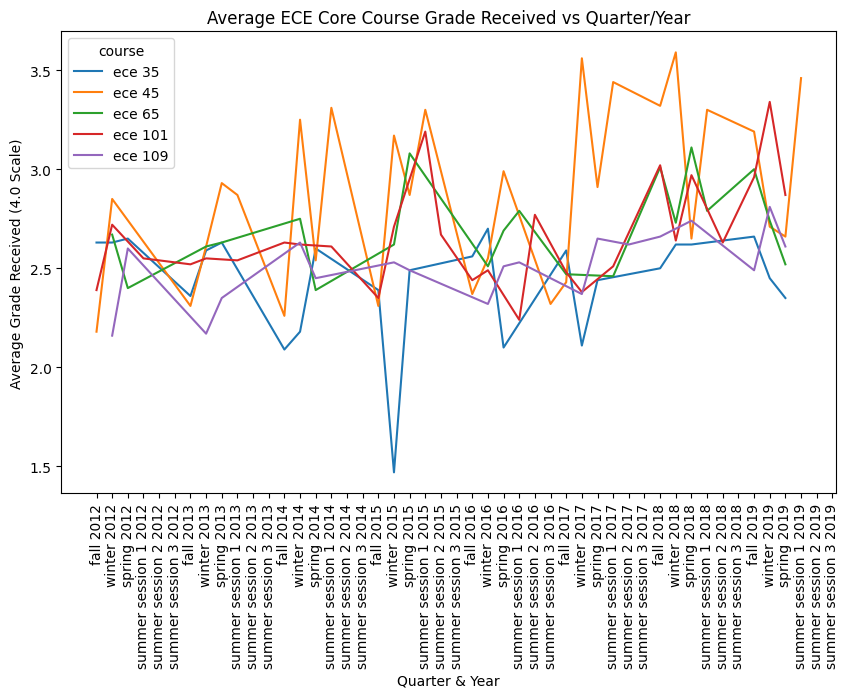

In [ ]:
# Plot 1: Average Grade Received in Core ECE Classes (ECE 35, 45, 65, 101, & 109) vs Quarter/Year
# Just to get an idea of quarter-to-quarter trends in grade averages in these courses, we will generate a lineplot using seaborn

plt.figure(figsize=(10, 6))
sns.lineplot(data = core_capes, x = 'quarter+year' , y ='avg_grade_received', hue = 'course', hue_order = ['ece 35','ece 45','ece 65','ece 101','ece 109'], errorbar=None)
plt.xticks(rotation=90)

plt.xlabel('Quarter & Year');
plt.ylabel('Average Grade Received (4.0 Scale)');
plt.title('Average ECE Core Course Grade Received vs Quarter/Year');

Text(0.5, 1.0, 'Average ECE Core Course Grade Expected vs Quarter/Year')

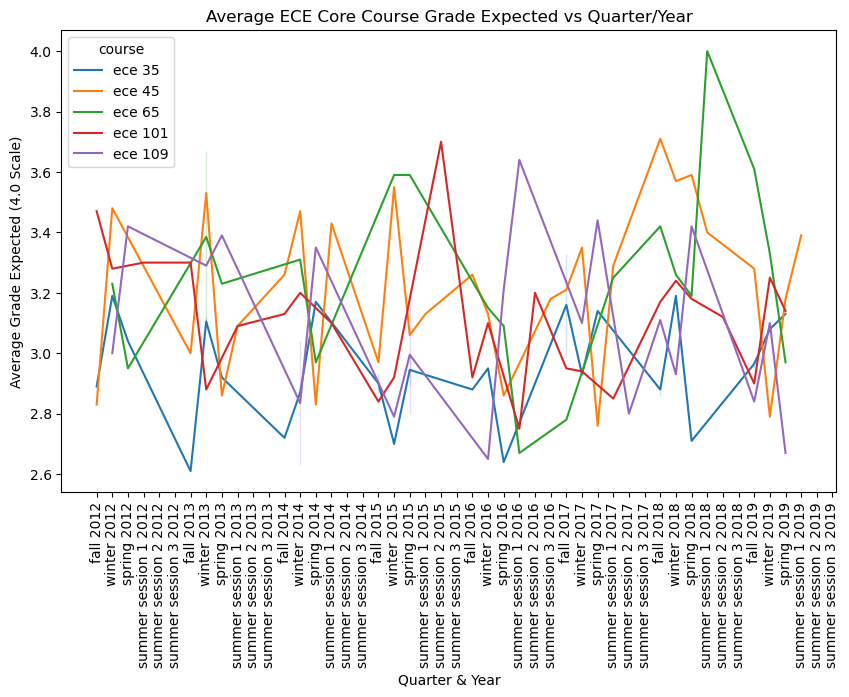

In [ ]:
# Plot 2: Average Grade Expected in Core ECE Classes (ECE 35, 45, 65, 101, & 109) vs Quarter/Year
# Let's also do the same for grade expectations in these courses, so as to get an idea of general student expectations towards these core courses

plt.figure(figsize=(10, 6))
sns.lineplot(data = core_capes, x = 'quarter+year' , y ='avg_grade_expected', hue = 'course', hue_order = ['ece 35','ece 45','ece 65','ece 101','ece 109'],errorbar=None)
plt.xticks(rotation=90)

plt.xlabel('Quarter & Year');
plt.ylabel('Average Grade Expected (4.0 Scale)');
plt.title('Average ECE Core Course Grade Expected vs Quarter/Year');

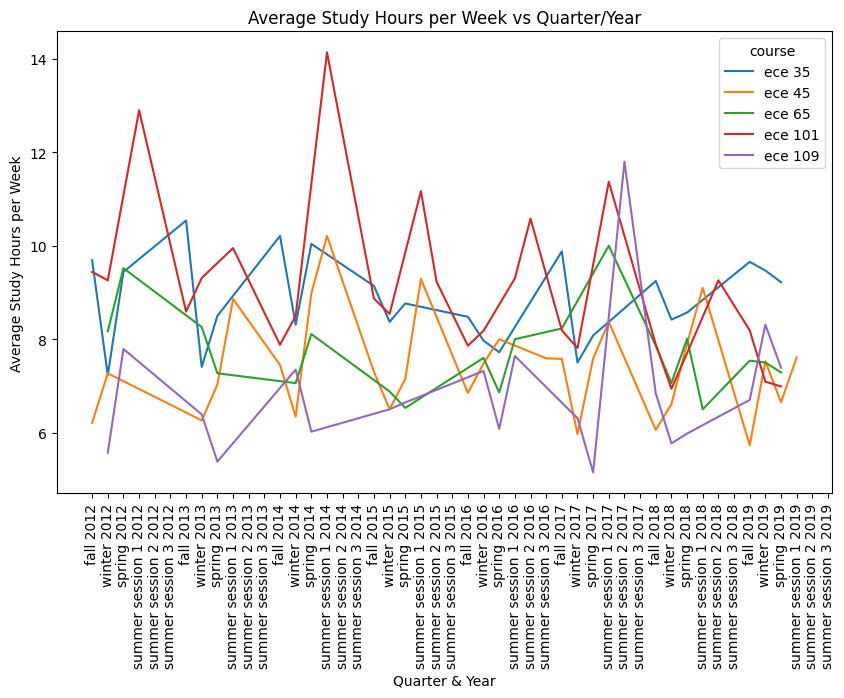

In [ ]:
# Plot 3: Average Study Hours/Week in Core ECE Classes (ECE 35, 45, 65, 101, & 109)
# Finally, let's generate a lineplot of average reported study hours per week in these courses, on the same quarter-to-quarter basis per class

plt.figure(figsize=(10, 6))
sns.lineplot(data = core_capes, x = 'quarter+year' , y ='hours_per_week', hue = 'course', hue_order = ['ece 35','ece 45','ece 65','ece 101','ece 109'],errorbar=None)
plt.xticks(rotation=90)

plt.xlabel('Quarter & Year');
plt.ylabel('Average Study Hours per Week');
plt.title('Average Study Hours per Week vs Quarter/Year');

Upon plotting the previous three CAPEs observations against the quarter/year a given class took place in, it is abundantly clear that the behavior is much too random/sporadic to glean any useful behavior from it. The most we can observe from this visualization is that student performance, regardless of the nature of their admission, is that performance varies **a lot** from quarter to quarter. As a result, we average these observations solely against the year a class took place in. From this we can now make reasonable observations of course difficulty.

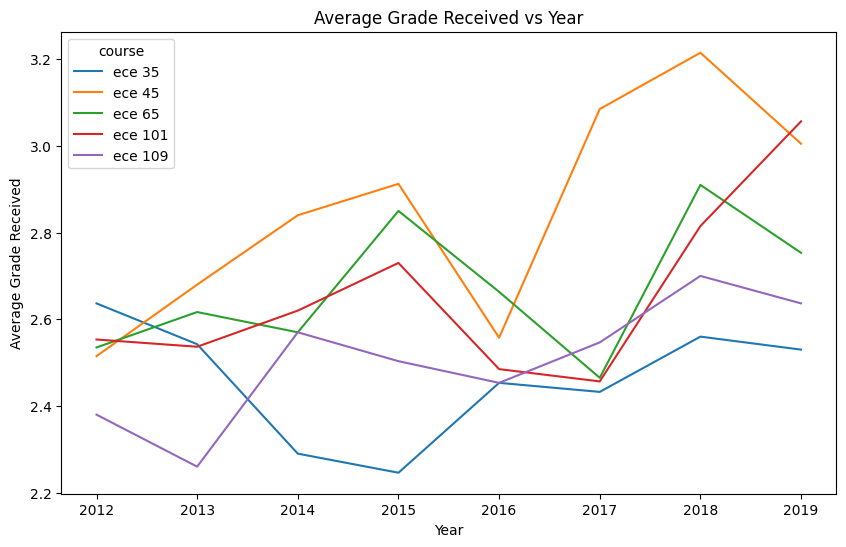

In [ ]:
# Plot 4: Average Grade Received in Core ECE Classes (ECE 35, 45, 65, 101, & 109) vs Year
# The previous plots are particularly hard to interpret due to visible "sporadic" behavior, so let's take average grades received in a course by the year they were taught in

# To do so we must make another dataframe, just to keep things simple and not further modify our filtered dataframe
yr_rec_grade_avg = core_capes.groupby(['course', 'year'])['avg_grade_received'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data = yr_rec_grade_avg, x = 'year' , y ='avg_grade_received', hue = 'course', hue_order = ['ece 35','ece 45','ece 65','ece 101','ece 109'],errorbar=None)
plt.xlabel('Year');
plt.ylabel('Average Grade Received');
plt.title('Average Grade Received vs Year');

The average grade received versus the year is still noticeably variant over time, but it remains clear that average grades gravitate towards an average grade of 2.6 which is approximately a B- average.

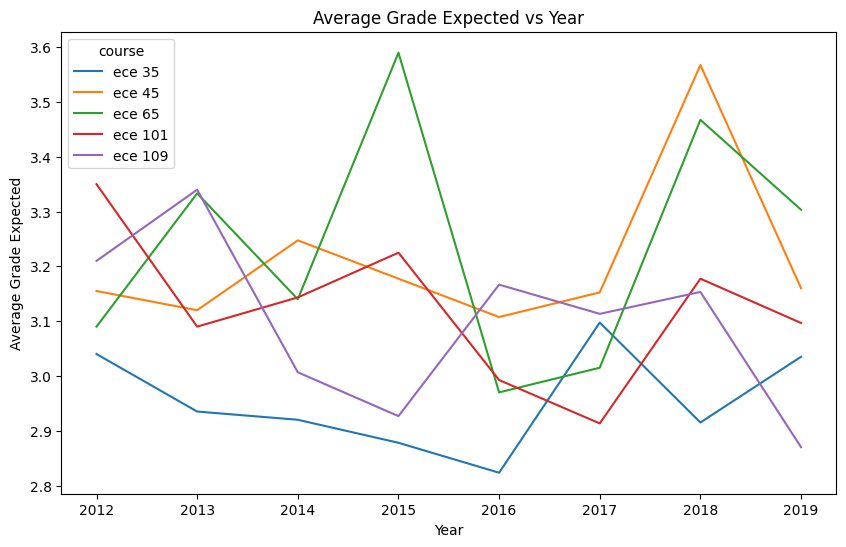

In [ ]:
# Plot 5: Average Grade Expected in Core ECE Classes (ECE 35, 45, 65, 101, & 109) vs Year

yr_exp_grade_avg = core_capes.groupby(['course', 'year'])['avg_grade_expected'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data = yr_exp_grade_avg, x = 'year' , y ='avg_grade_expected', hue = 'course', hue_order = ['ece 35','ece 45','ece 65','ece 101','ece 109'],errorbar=None)
plt.xlabel('Year');
plt.ylabel('Average Grade Expected');
plt.title('Average Grade Expected vs Year');

With the yearly, average grade expected in a given course, we can observe that expectations also deeply vary over the years. Although we can reasonably assume that students will usually overestimate what grade they expect to earn in a course, the fact that expectations are cluster around about a B-grade is indicative of perceived ECE course difficulty.   

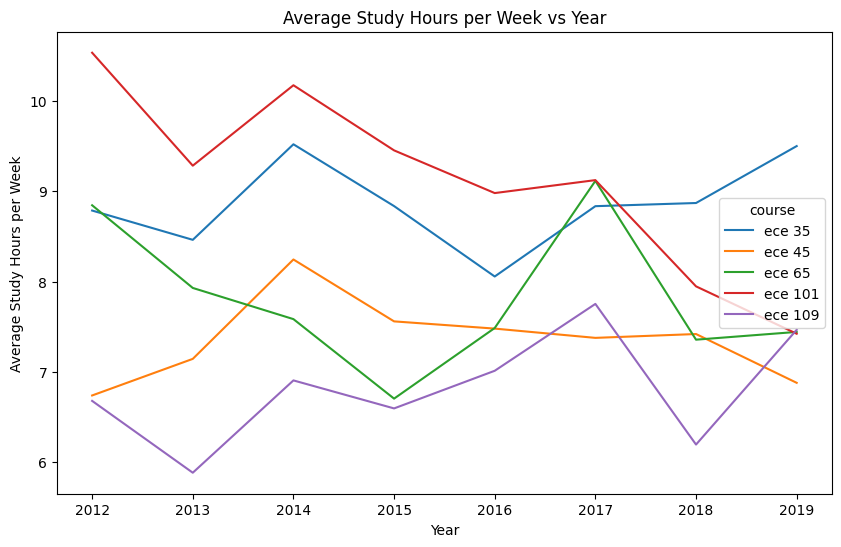

In [ ]:
# Plot 6: Average Study Hours/Week in Core ECE Classes (ECE 35, 45, 65, 101, & 109) vs Year

yr_study_avg = core_capes.groupby(['course', 'year'])['hours_per_week'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data = yr_study_avg, x = 'year' , y ='hours_per_week', hue = 'course', hue_order = ['ece 35','ece 45','ece 65','ece 101','ece 109'],errorbar=None)
plt.xlabel('Year');
plt.ylabel('Average Study Hours per Week');
plt.title('Average Study Hours per Week vs Year');

The plotted course study hours per week as averaged by the given year are also indicative of ECE course rigor here. The plot's lines are centered around 8 hours, with other lines seeing study hours as high as 10 hours per week.

Despite the generally sporadic/all-over-the-place appearance of the plotted UCSD CAPEs Data for core Electrical and Computer Engineering classes, it is abundantly clear that the courses are incredibly difficult. Coupling this observation with how densely packed transfer student schedules are (see presentation), we can safely say that the inherent rigor of ECE courses is a contributor to what may be a more difficult ECE experience at UCSD for them.

## UCSD Institutional Research Data Analysis -- Visualized Retention and Graduation?
Using the UCSD Institutional Research Data, we will analyze retention and graduation rates by comparing the rates between first-year admits and transfer students within the UCSD Electrical and Computer Engineering department. In this analysis, retention rate refers to the percentage of students continue at UCSD the next year and graduate rate refers to the percentage of students that complete their program.

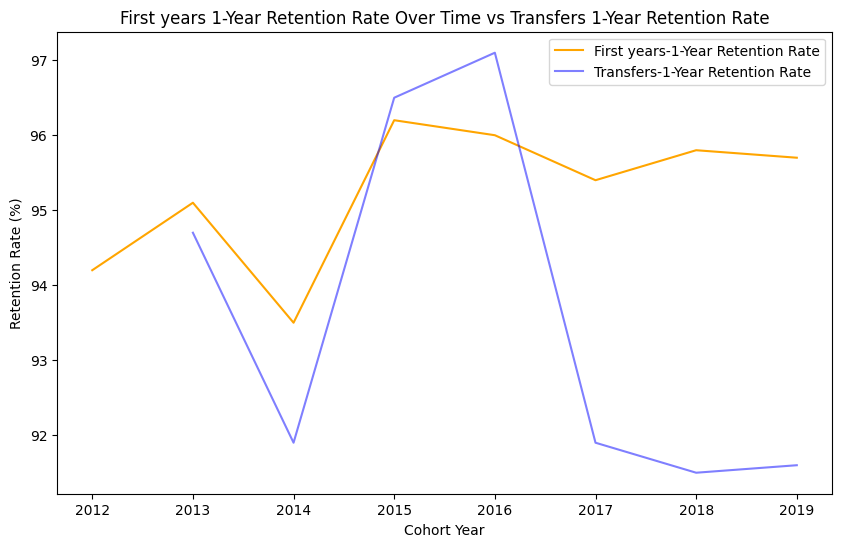

In [ ]:
#Plot 1: Retention Rate of First-Year students
#  We are using seaborn to generate line plot to give an idea of the retention rates comparing first years and transfer students between 2012 to 2019

plt.figure(figsize=(10, 6))
sns.lineplot(x=first_year_retention_df["Cohort "],y=first_year_retention_df["1 Yr Retention (percent)"], label="First years-1-Year Retention Rate", color = 'orange')
sns.lineplot(x=transfer_retention_df["Cohort "],y=transfer_retention_df["1 Yr Retention"], label="Transfers-1-Year Retention Rate",color = 'blue', alpha = 0.5)
plt.xlabel("Cohort Year");
plt.ylabel("Retention Rate (%)");
plt.title("First years 1-Year Retention Rate Over Time vs Transfers 1-Year Retention Rate");
#plt.xticks(rotation=45)
plt.legend();

In general, we can see that first year retention rates are higher than transfer retention rates throughout the years. In other words, more first year students stayed in schools after a year compared to transfer students. In the following graphs, we will be looking at the graduation rates.

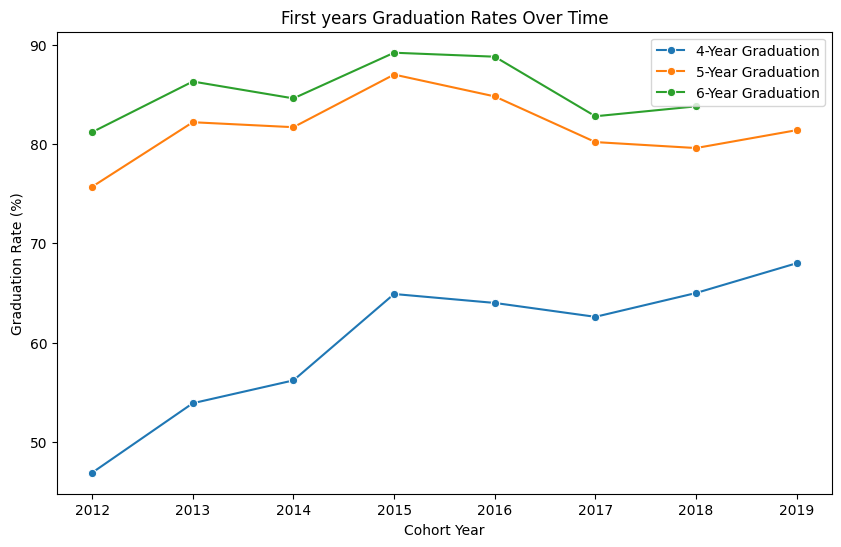

In [ ]:
# Plot 2: First Years Graduation Rate Over Time (4, 5, 6 years)
#  We are using seaborn to generate line plot to give an idea of the graduation rates for first years which is broken down by 4,5,6 years
plt.figure(figsize=(10, 6))
sns.lineplot(x=first_year_graduation_df["Cohort "], y=first_year_graduation_df["4 Yr Percentage"], marker="o", label="4-Year Graduation")
sns.lineplot(x=first_year_graduation_df["Cohort "], y=first_year_graduation_df["5 Yr Percentage"], marker="o", label="5-Year Graduation")
sns.lineplot(x=first_year_graduation_df["Cohort "], y=first_year_graduation_df["6 Yr Percentage"], marker="o", label="6-Year Graduation")
plt.xlabel("Cohort Year")
plt.ylabel("Graduation Rate (%)")
plt.title("First years Graduation Rates Over Time")
#plt.xticks(rotation=45)
plt.legend();

From 2012 to 2019, we can see that there is a stable increase in graduation rates for the first year admitted students regardless of how long the students take to graduate.

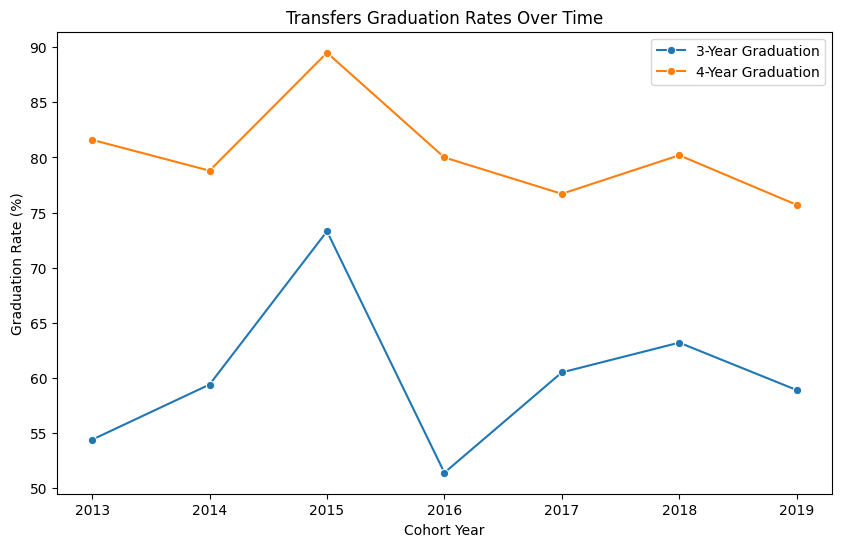

In [ ]:
# Plot 3: Transfers Graduation Rate Over Time (3,4 years)
#  We are using seaborn to generate line plot to give an idea of the graduation rates for transfer students which is broken down by 3, 4 years

plt.figure(figsize=(10, 6))
sns.lineplot(x=transfer_graduation_df["Cohort "], y=transfer_graduation_df["3 Yr Percentage"], marker="o", label="3-Year Graduation")
sns.lineplot(x=transfer_graduation_df["Cohort "], y=transfer_graduation_df["4 Yr Percentage"], marker="o", label="4-Year Graduation")
plt.xlabel("Cohort Year")
plt.ylabel("Graduation Rate (%)")
plt.title("Transfers Graduation Rates Over Time")
#plt.xticks(rotation=45)
plt.legend();

From 2013 to 2019, we can see that there is a stable increase in graduation rates for the transfer students in 3 years. However, for transfer students who took 4 years, the graduation rate decreased throughout the year. We can also see that the graduation rate is also generally higher for first year admitted students compared with transfer students. In the following plots, assuming transfer students spent 2 years in community college, we are going to plot students who left high school in the same time. In other words, we are comparing students who spent the same amount of time in college.

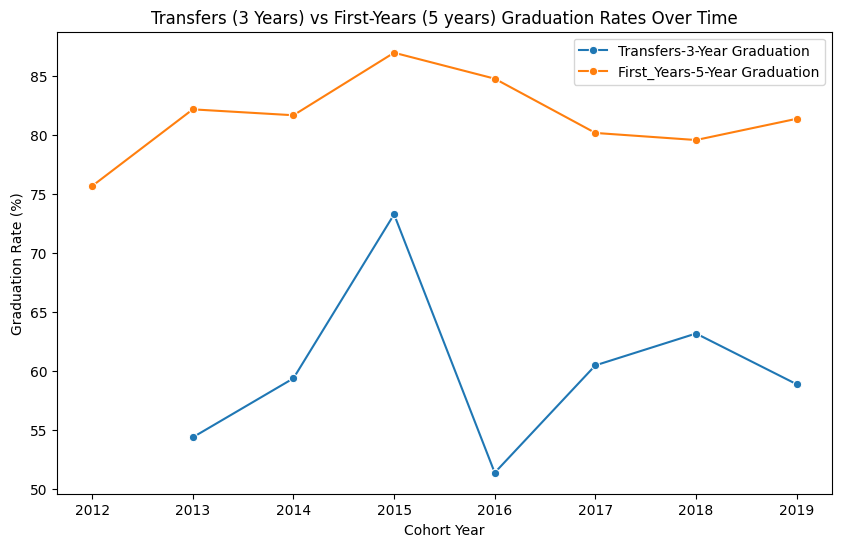

In [ ]:
# Plot 4: Transfers vs First years  Graduation Rate Over Time
#  On average, transfer students spend two years in community college, so we are comparing the same student batch who left high school.
#  In other words, these are the students who began college the same time and spent 5 years in college
#  We are combining the parts of the two graphs generated above. This one specifically is comparing first year students who take five years to finish
#  and transfer students who take 3 years to finish.


plt.figure(figsize=(10, 6))
sns.lineplot(x=transfer_graduation_df["Cohort "], y=transfer_graduation_df["3 Yr Percentage"], marker="o", label="Transfers-3-Year Graduation")
sns.lineplot(x=first_year_graduation_df["Cohort "], y=first_year_graduation_df["5 Yr Percentage"], marker="o", label="First_Years-5-Year Graduation")
plt.xlabel("Cohort Year")
plt.ylabel("Graduation Rate (%)")
plt.title("Transfers (3 Years) vs First-Years (5 years) Graduation Rates Over Time")
#plt.xticks(rotation=45)
plt.legend();

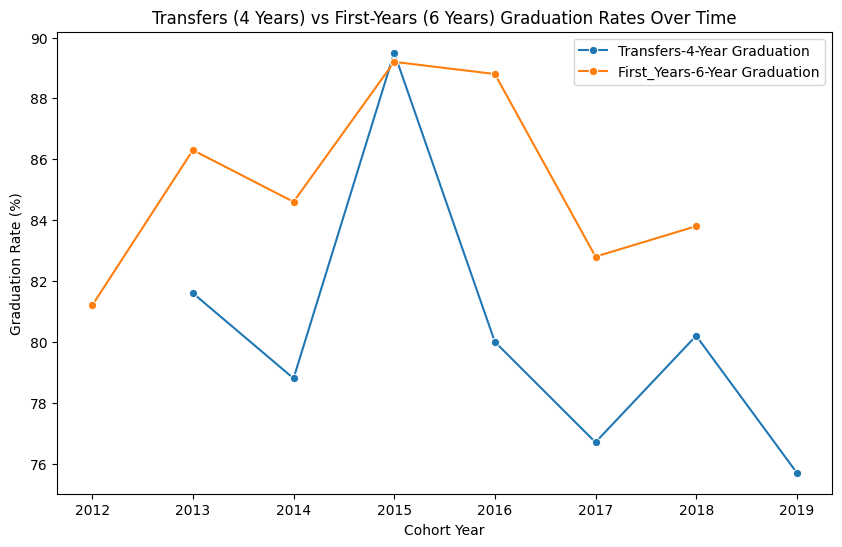

In [ ]:
# Plot 5: Transfers vs First years  Graduation Rate Over Time
#  On average, transfer students spend two years in community college, so we are comparing the same student batch who left high school.
#  This graph is essentially the same groph as the one above but the only difference is that these students spent 6 years in college
#  We are combining the parts of the two graphs generated above. This one specifically is comparing first year students who take 6 years to finish
#  and transfer students who take 4 years to finish.

plt.figure(figsize=(10, 6))
sns.lineplot(x=transfer_graduation_df["Cohort "], y=transfer_graduation_df["4 Yr Percentage"], marker="o", label="Transfers-4-Year Graduation")
sns.lineplot(x=first_year_graduation_df["Cohort "], y=first_year_graduation_df["6 Yr Percentage"], marker="o", label="First_Years-6-Year Graduation")
plt.xlabel("Cohort Year")
plt.ylabel("Graduation Rate (%)")
plt.title("Transfers (4 Years) vs First-Years (6 Years) Graduation Rates Over Time")
#plt.xticks(rotation=45)
plt.legend();

From 2012 to 2019, if we see 4 year transfers vs 6 years freshmen, the graduation rate is lower for the transfers compared with the first years. This trend is also visible when comparing 3 year transfers vs 5 years freshmen. That means, we can conclude that freshmen admitted students relatively spent less time in college, and have a higher probability to graduate. Now, what if we give transfer students an extra year to graduate? Would we expect higher graduation for transfers? We are going to plot them in the following section.


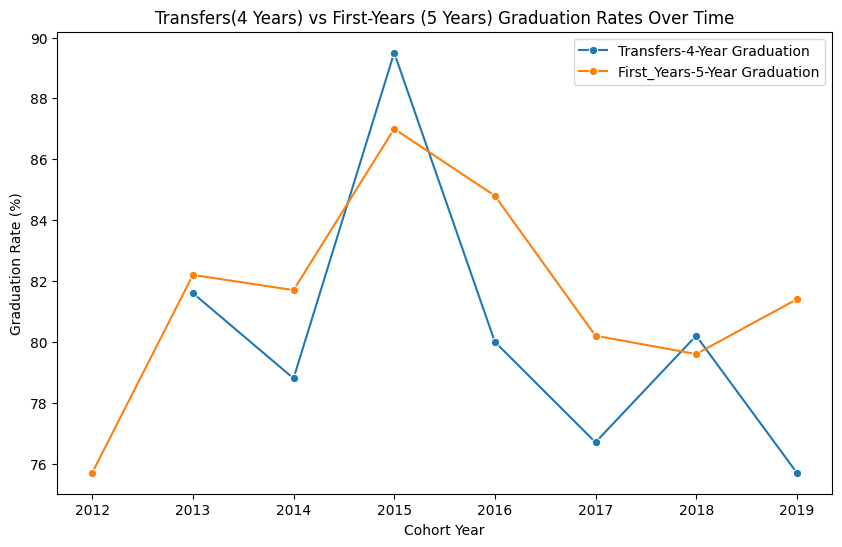

In [ ]:
# Plot 6: Transfers vs First years Graduation Rate Over Time
# As we can see, in general, transfer students does not have graduation rate as high as their counterpart. Let's give transfer students one more year.
# This plot will be comparing transfer students who take 4 years in UCSD to graduate and first year students who take 5 years to finish

plt.figure(figsize=(10, 6))
sns.lineplot(x=transfer_graduation_df["Cohort "], y=transfer_graduation_df["4 Yr Percentage"], marker="o", label="Transfers-4-Year Graduation")
sns.lineplot(x=first_year_graduation_df["Cohort "], y=first_year_graduation_df["5 Yr Percentage"], marker="o", label="First_Years-5-Year Graduation")
plt.xlabel("Cohort Year")
plt.ylabel("Graduation Rate (%)")
plt.title("Transfers(4 Years) vs First-Years (5 Years) Graduation Rates Over Time")
#plt.xticks(rotation=45)
plt.legend();

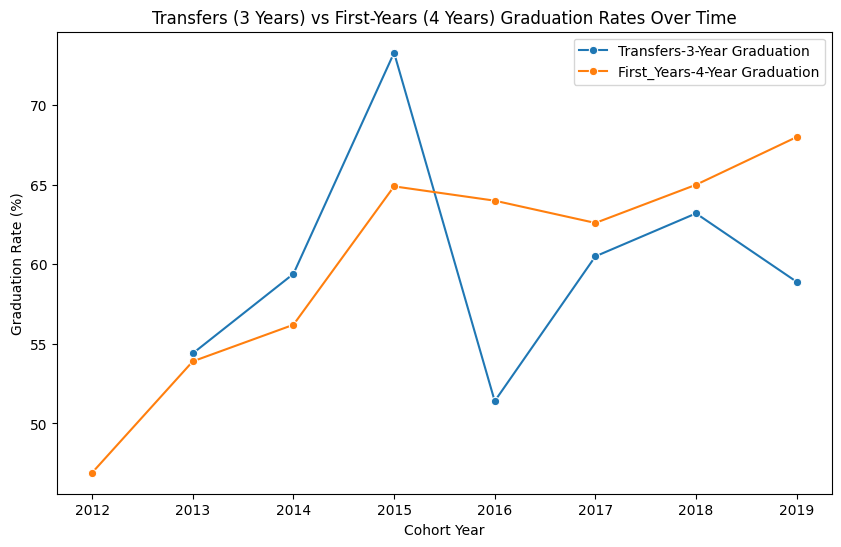

In [ ]:
# Plot 7: Transfers vs First years Graduation Rate Over Time
# 4 years (first years) compared to 3 years (transfers)
# As we can see, in general, transfer students does not have graduation rate as high as their counterpart. Let's give transfer students one more year.
# This plot will be comparing transfer students who take 3 years in UCSD to graduate and first year students who take 4 years to finish

plt.figure(figsize=(10, 6))
sns.lineplot(x=transfer_graduation_df["Cohort "], y=transfer_graduation_df["3 Yr Percentage"], marker="o", label="Transfers-3-Year Graduation")
sns.lineplot(x=first_year_graduation_df["Cohort "], y=first_year_graduation_df["4 Yr Percentage"], marker="o", label="First_Years-4-Year Graduation")
plt.xlabel("Cohort Year")
plt.ylabel("Graduation Rate (%)")
plt.title("Transfers (3 Years) vs First-Years (4 Years) Graduation Rates Over Time")
#plt.xticks(rotation=45)
plt.legend();

We can see that the graduation rate for freshmen admitted students are generally slightly higher even if you allotted transfer students an extra year.

## UCSD Institutional Research Data Model Analysis

Based on our previous IR data visualizations, we will also examine transfer student acceptance rates and investigate its potential correlation with transfer graduation rates using a linear regression model in order for our analysis to be as comprehensive as possible.


**1. Transfer Admission Rate vs Graduation Rate:**

Admission columns: ['Cohort', 'Admission Rate', 'Enrolled GPA']
Graduation columns: ['Cohort', '3 Yr Percentage', '3 Yr Number', '4 Yr Percentage', '4 Yr Number']
Admission Data:
   Cohort  Admission Rate Enrolled GPA
0    2012              50    3.22-3.63
1    2013              63    3.35-3.70
2    2014              57    3.54-3.83
3    2015              34    3.47-3.77
4    2016              36    3.59-3.83

Graduation Data:
   Cohort  3 Yr Percentage  3 Yr Number  4 Yr Percentage  4 Yr Number
0    2013             54.4          112             81.6          168
1    2014             59.4           95             78.8          126
2    2015             73.3           42             89.5           51
3    2016             51.4           18             80.0           28
4    2017             60.5           52             76.7           66

Graduation Data with EntryCohort:
   Cohort  EntryCohort
0    2013         2010
1    2014         2011
2    2015         2012
3    2016         2013

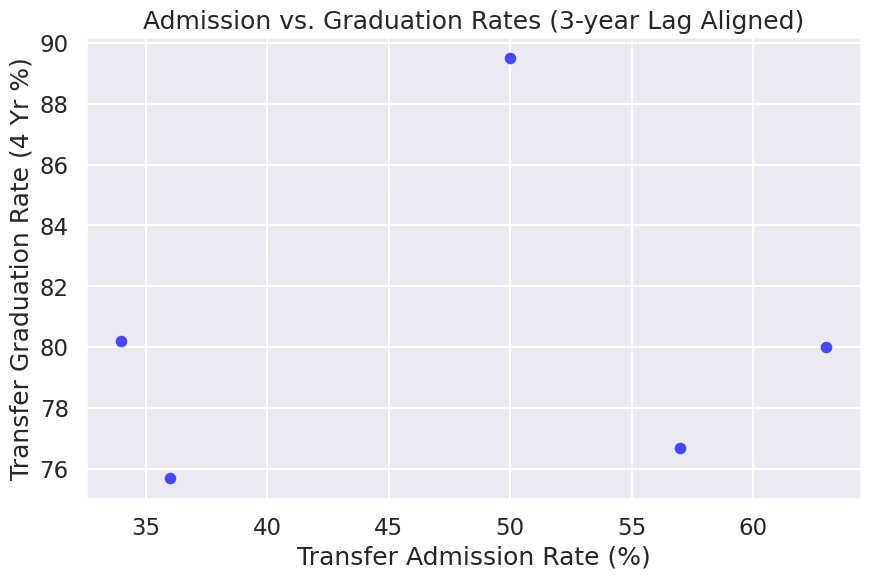

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                             OLS Regression Results                             
Dep. Variable:     Q('4 Yr Percentage')   R-squared:                       0.019
Model:                              OLS   Adj. R-squared:                 -0.308
Method:                   Least Squares   F-statistic:                   0.05748
Date:                  Fri, 14 Mar 2025   Prob (F-statistic):              0.826
Time:                          21:40:32   Log-Likelihood:                -14.967
No. Observations:                     5   AIC:                             33.93
Df Residuals:                         3   BIC:                             33.15
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept     

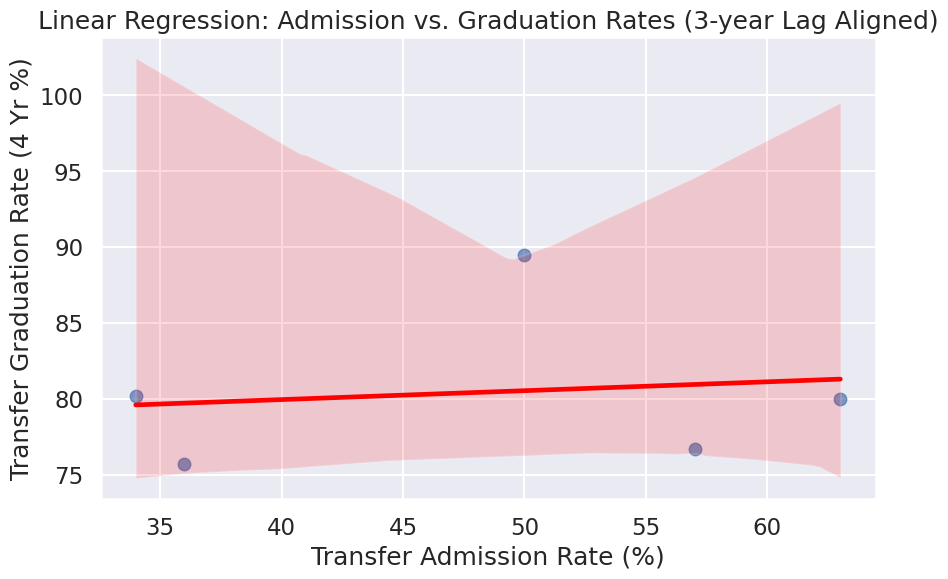

In [ ]:
## Imports

sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm

# Load the CSV file

gpa_url= 'https://raw.githubusercontent.com/YongQuanNeo/COGS108_Repo/main/COGS%20108%20Data%20-%20TRANSFER%20STUDENT%20ECE%20ADMISSION%20RATE.csv'
ece_gpa_df = pd.read_csv(gpa_url, on_bad_lines='skip')

transfer_retention_url = "https://raw.githubusercontent.com/YongQuanNeo/COGS108_Repo/main/COGS%20108%20Data%20-%20TRANSFER%201%20Yr%20RETENTION%20RATE.csv"
transfer_retention_df = pd.read_csv(transfer_retention_url, on_bad_lines='skip')

transfer_admission_url = "https://raw.githubusercontent.com/YongQuanNeo/COGS108_Repo/main/COGS%20108%20Data%20-%20TRANSFER%20STUDENT%20ECE%20ADMISSION%20RATE.csv"
transfer_graduation_url = "https://raw.githubusercontent.com/YongQuanNeo/COGS108_Repo/main/COGS%20108%20Data%20-%20TRANSFER%20STUDENT%20GRADUATION%20RATE.csv"

adm_df = pd.read_csv(transfer_admission_url, on_bad_lines='skip')
grad_df = pd.read_csv(transfer_graduation_url, on_bad_lines='skip')

# Strip extra space
adm_df.columns = adm_df.columns.str.strip()
grad_df.columns = grad_df.columns.str.strip()



print("Admission columns:", adm_df.columns.tolist())
print("Graduation columns:", grad_df.columns.tolist())

print("Admission Data:")
print(adm_df.head())
print("\nGraduation Data:")
print(grad_df.head())

# Align Cohorts (3 years to graduate)
grad_df['EntryCohort'] = grad_df['Cohort'] - 3
print("\nGraduation Data with EntryCohort:")
print(grad_df[['Cohort', 'EntryCohort']].head())

# Merge data
merged_df = pd.merge(adm_df, grad_df, left_on="Cohort", right_on="EntryCohort", how="inner")
print("\nMerged Data:")
print(merged_df.head())

# Data Prepa
# Make "Admission Rate" and "4 Yr Percentage" to numbers.
merged_df["Admission Rate"] = pd.to_numeric(merged_df["Admission Rate"], errors="coerce")
merged_df["4 Yr Percentage"] = pd.to_numeric(merged_df["4 Yr Percentage"], errors="coerce")

# Drop rows with missing values
merged_df = merged_df.dropna(subset=["Admission Rate", "4 Yr Percentage"])


plt.figure(figsize=(10, 6))
sns.scatterplot(x="Admission Rate", y="4 Yr Percentage", data=merged_df, color="blue", alpha=0.7)
plt.xlabel("Transfer Admission Rate (%)")
plt.ylabel("Transfer Graduation Rate (4 Yr %)")
plt.title("Admission vs. Graduation Rates (3-year Lag Aligned)")
plt.show()

# Try Linear Regression Model
y, X = patsy.dmatrices("Q('4 Yr Percentage') ~ Q('Admission Rate')", data=merged_df, return_type="dataframe")
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

# Plotting the regression
plt.figure(figsize=(10, 6))
sns.regplot(x="Admission Rate", y="4 Yr Percentage", data=merged_df,
            scatter_kws={"alpha":0.7}, line_kws={"color":"red"})
plt.xlabel("Transfer Admission Rate (%)")
plt.ylabel("Transfer Graduation Rate (4 Yr %)")
plt.title("Linear Regression: Admission vs. Graduation Rates (3-year Lag Aligned)")
plt.show()

# # Residual Plot
# plt.figure(figsize=(10, 6))
# sns.residplot(x=ols_model.fittedvalues, y=ols_model.resid, lowess=True,
#               line_kws={"color": "red", "lw": 2})
# plt.xlabel("Fitted Values")
# plt.ylabel("Residuals")
# plt.title("Residual Plot")
# plt.show()

# # Merging (Cohort has whitespace behind it so use the stripped data)
# merged_df = pd.merge(adm_df, grad_df, on="Cohort", how="inner")
# print("\nMerged Data:")
# print(merged_df.head())

# # Data Prep
# merged_df["Admission Rate"] = pd.to_numeric(merged_df["Admission Rate"], errors="coerce")
# merged_df["4 Yr Percentage"] = pd.to_numeric(merged_df["4 Yr Percentage"], errors="coerce")

# # Drop rows with missing value
# merged_df = merged_df.dropna(subset=["Admission Rate", "4 Yr Percentage"])


**Linear Regression Analysis:**
- Linear regression line: Graduation Rate = 87.52−0.1337 × Admission Rate
    - β0 = intercept = 77.61
    - β1 = slope = 0.1337
        - The intercept (77.61) is statistically significant (p = 0.008).
        - The slope for Admission Rate (0.0586) has a p-value of 0.826, meaning it is not statistically significant. This suggests that we do not have evidence that admission rate is a significant predictor of graduation rate.

- Detailed Analysis based on LRM:
    - R^2 =  0.019: Only 1.9% of the variability in graduation rate is explained by the admission rate.  .
        - This suggests that the admission rate isn’t a very strong predictor of graduation rate in this dataset.

- Potential Issues:
    - Since there are only 5 observations, with such a small sample, our estimates can be very unstable and it’s hard to detect any true relationship.


**2. Admission GPA vs Graduation Rate:**

   Cohort        GPA  MeanGPA
0    2012  3.22-3.63    3.425
1    2013  3.35-3.70    3.525
2    2014  3.54-3.83    3.685
3    2015  3.47-3.77    3.620
4    2016  3.59-3.83    3.710
count    6.000000
mean     3.582500
std      0.108662
min      3.425000
25%      3.526250
50%      3.575000
75%      3.668750
max      3.710000
Name: MeanGPA, dtype: float64


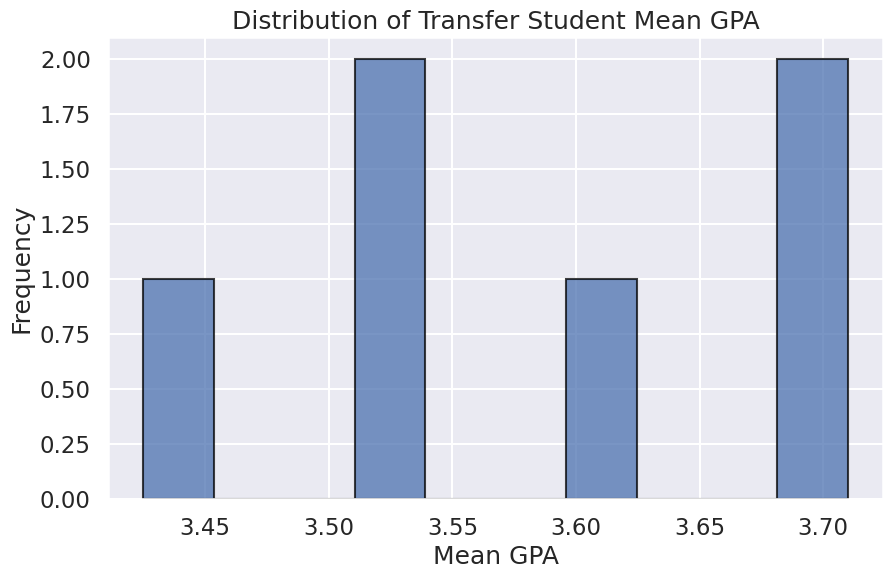

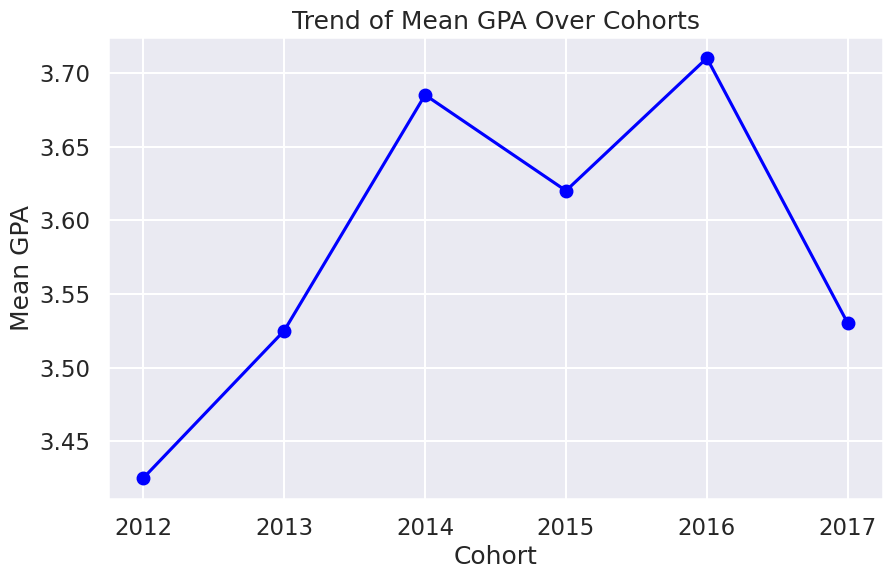

In [ ]:
# Strip whitespace
ece_gpa_df.columns = ece_gpa_df.columns.str.strip()
#  print(ece_gpa_df.columns.tolist())

# Rename the GPA (debug)
ece_gpa_df.rename(columns={'Enrolled GPA': 'GPA'}, inplace=True)

# Func to split the GPA & compute mean.
def parse_gpa_range(gpa_str):
    try:
        parts = gpa_str.split('-')
        if len(parts) == 2:
            low = float(parts[0])
            high = float(parts[1])
            return (low + high) / 2.0
        else:
            return np.nan
    except Exception as e:
        print("Error parsing GPA:", gpa_str, e)
        return np.nan

# Create a new MeanGPA
ece_gpa_df['MeanGPA'] = ece_gpa_df['GPA'].apply(parse_gpa_range)
print(ece_gpa_df[['Cohort', 'GPA', 'MeanGPA']].head())

# Print summary:
print(ece_gpa_df['MeanGPA'].describe())

# Plot the distribution:
plt.figure(figsize=(10,6))
plt.hist(ece_gpa_df['MeanGPA'].dropna(), bins=10, edgecolor='black', alpha=0.75)
plt.xlabel("Mean GPA")
plt.ylabel("Frequency")
plt.title("Distribution of Transfer Student Mean GPA")
plt.show()

# If you want to examine trends over time (assuming Cohort represents year):
plt.figure(figsize=(10,6))
plt.plot(ece_gpa_df['Cohort'], ece_gpa_df['MeanGPA'], marker='o', linestyle='-', color='blue')
plt.xlabel("Cohort")
plt.ylabel("Mean GPA")
plt.title("Trend of Mean GPA Over Cohorts")
plt.grid(True)
plt.show()



Admission Data:
   Cohort  Admission Rate        GPA
0    2012              50  3.22-3.63
1    2013              63  3.35-3.70
2    2014              57  3.54-3.83
3    2015              34  3.47-3.77
4    2016              36  3.59-3.83

Graduation Data:
   Cohort  3 Yr Percentage  3 Yr Number  4 Yr Percentage  4 Yr Number  \
0    2013             54.4          112             81.6          168   
1    2014             59.4           95             78.8          126   
2    2015             73.3           42             89.5           51   
3    2016             51.4           18             80.0           28   
4    2017             60.5           52             76.7           66   

   EntryCohort  
0         2010  
1         2011  
2         2012  
3         2013  
4         2014  

Admission Data with MeanGPA:
   Cohort        GPA  MeanGPA
0    2012  3.22-3.63    3.425
1    2013  3.35-3.70    3.525
2    2014  3.54-3.83    3.685
3    2015  3.47-3.77    3.620
4    2016  3.59-3.83   

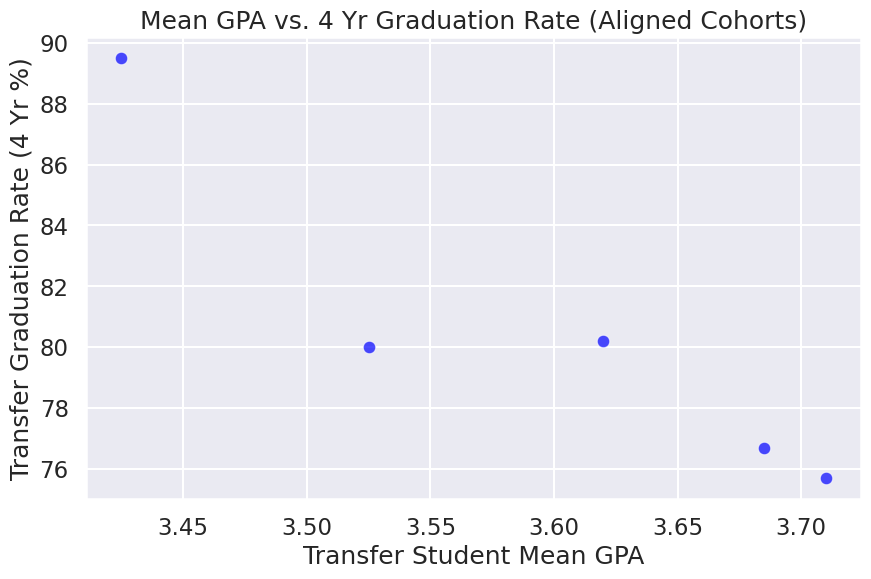

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                             OLS Regression Results                             
Dep. Variable:     Q('4 Yr Percentage')   R-squared:                       0.868
Model:                              OLS   Adj. R-squared:                  0.824
Method:                   Least Squares   F-statistic:                     19.75
Date:                  Fri, 14 Mar 2025   Prob (F-statistic):             0.0212
Time:                          21:40:41   Log-Likelihood:                -9.9497
No. Observations:                     5   AIC:                             23.90
Df Residuals:                         3   BIC:                             23.12
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    234.9777     34.794

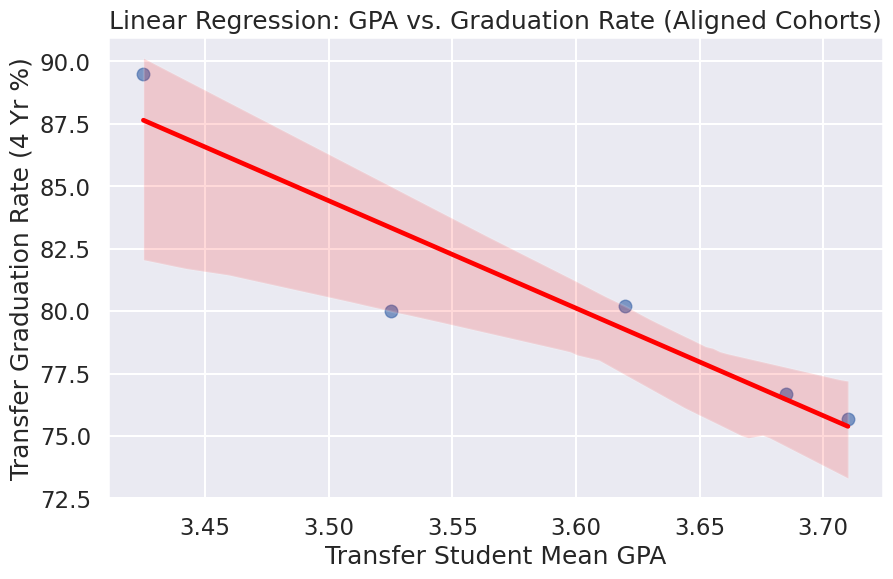

In [ ]:
#Linear Regression Analysis GPA vs Graduation Rate

# Rename Enrolled GPA to GPA
adm_df.rename(columns={'Enrolled GPA': 'GPA'}, inplace=True)

print("Admission Data:")
print(adm_df.head())
print("\nGraduation Data:")
print(grad_df.head())

def parse_gpa_range(gpa_str):
    try:
        parts = gpa_str.split('-')
        if len(parts) == 2:
            low = float(parts[0])
            high = float(parts[1])
            return (low + high) / 2.0
        else:
            return np.nan
    except Exception as e:
        print("Error parsing GPA:", gpa_str, e)
        return np.nan

adm_df['MeanGPA'] = adm_df['GPA'].apply(parse_gpa_range)
print("\nAdmission Data with MeanGPA:")
print(adm_df[['Cohort', 'GPA', 'MeanGPA']].head())

# Align Cohorts
# Assuming transfers take 3 years to graduate, we create a new column "EntryCohort" in grad_df.
grad_df['EntryCohort'] = grad_df['Cohort'] - 3
print("\nGraduation Data with EntryCohort:")
print(grad_df[['Cohort', 'EntryCohort']].head())

# Merge Data
merged_df = pd.merge(adm_df, grad_df, left_on="Cohort", right_on="EntryCohort", how="inner")
print("\nMerged Data:")
print(merged_df.head())

# Data Preparation
merged_df["MeanGPA"] = pd.to_numeric(merged_df["MeanGPA"], errors="coerce")
merged_df["4 Yr Percentage"] = pd.to_numeric(merged_df["4 Yr Percentage"], errors="coerce")
merged_df = merged_df.dropna(subset=["MeanGPA", "4 Yr Percentage"])

# Plot 1
plt.figure(figsize=(10,6))
sns.scatterplot(x="MeanGPA", y="4 Yr Percentage", data=merged_df, color="blue", alpha=0.7)
plt.xlabel("Transfer Student Mean GPA")
plt.ylabel("Transfer Graduation Rate (4 Yr %)")
plt.title("Mean GPA vs. 4 Yr Graduation Rate (Aligned Cohorts)")
plt.show()

# LRM
y, X = patsy.dmatrices("Q('4 Yr Percentage') ~ MeanGPA", data=merged_df, return_type="dataframe")
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

# Regression Line
plt.figure(figsize=(10,6))
sns.regplot(x="MeanGPA", y="4 Yr Percentage", data=merged_df,
            scatter_kws={"alpha": 0.7}, line_kws={"color": "red"})
plt.xlabel("Transfer Student Mean GPA")
plt.ylabel("Transfer Graduation Rate (4 Yr %)")
plt.title("Linear Regression: GPA vs. Graduation Rate (Aligned Cohorts)")
plt.show()

# # Residual Plot
# plt.figure(figsize=(10,6))
# sns.residplot(x=ols_model.fittedvalues, y=ols_model.resid, lowess=True,
#               line_kws={"color": "red", "lw": 2})
# plt.xlabel("Fitted Values")
# plt.ylabel("Residuals")
# plt.title("Residual Plot")
# plt.show()


**Linear Regression Analysis:**
- Linear regression line: Graduation Rate = 234.98−43.02×MeanGPA
    - β0 = intercept = 234.98
    - β1 = slope = -43.02
        - The slope is statistically significant. It suggests that higher MeanGPA is associated with lower graduation rates.

- Detailed Analysis based on LRM:
    - R^2 = 0.868: 87% of the variance in the graduation rate is explained by MeanGPA.
        - This suggests that the admission rate isn’t a very strong predictor of graduation rate in this dataset.
    - The negative slope indicates that, in UCSD, a higher average transfer GPA is associated with a lower graduation rate.

- Potential Issues:
    -  However, due to the very small sample size and the possibility of confounding factors, further analysis with a larger dataset and additional variables might provide a clearer picture of the underlying relationship.

- Interpretaion of data:
    - The negative slope indicates a negative relationship between admitted student GPA and their graduation rate. This does not match our expectations. We suspect that this may be due to unmeasured variables.

Admission Data with MinGPA and MaxGPA:
   Cohort        GPA  MinGPA  MaxGPA
0    2012  3.22-3.63    3.22    3.63
1    2013  3.35-3.70    3.35    3.70
2    2014  3.54-3.83    3.54    3.83
3    2015  3.47-3.77    3.47    3.77
4    2016  3.59-3.83    3.59    3.83

Graduation Data with EntryCohort:
   Cohort  EntryCohort
0    2013         2010
1    2014         2011
2    2015         2012
3    2016         2013
4    2017         2014

Merged Data:
   Cohort_x  Admission Rate        GPA  MeanGPA  MinGPA  MaxGPA  Cohort_y  \
0      2012              50  3.22-3.63    3.425    3.22    3.63      2015   
1      2013              63  3.35-3.70    3.525    3.35    3.70      2016   
2      2014              57  3.54-3.83    3.685    3.54    3.83      2017   
3      2015              34  3.47-3.77    3.620    3.47    3.77      2018   
4      2016              36  3.59-3.83    3.710    3.59    3.83      2019   

   3 Yr Percentage  3 Yr Number  4 Yr Percentage  4 Yr Number  EntryCohort  
0           

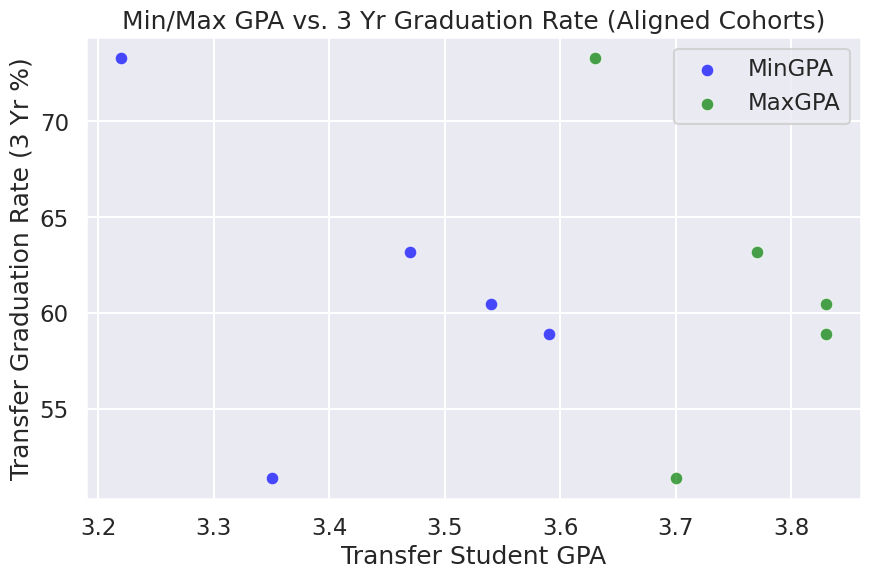

                             OLS Regression Results                             
Dep. Variable:     Q('3 Yr Percentage')   R-squared:                       0.230
Model:                              OLS   Adj. R-squared:                 -0.540
Method:                   Least Squares   F-statistic:                    0.2983
Date:                  Fri, 14 Mar 2025   Prob (F-statistic):              0.770
Time:                          21:42:35   Log-Likelihood:                -16.241
No. Observations:                     5   AIC:                             38.48
Df Residuals:                         2   BIC:                             37.31
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -85.9456    833.780

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:

#Linrear Regression Analysis GPA vs Graduation Rate

# Rename Enrolled GPA to GPA
# adm_df.rename(columns={'Enrolled GPA': 'GPA'}, inplace=True)

# print("Admission Data:")
# print(adm_df.head())
# print("\nGraduation Data:")
# print(grad_df.head())

# Extract Min and MaxGPA
def parse_gpa_min_max(gpa_str):
    try:
        parts = gpa_str.split('-')
        if len(parts) == 2:
            min_gpa = float(parts[0])
            max_gpa = float(parts[1])
            return min_gpa, max_gpa
        else:
            return np.nan, np.nan
    except Exception as e:
        print("Error parsing GPA:", gpa_str, e)
        return np.nan, np.nan

# Create new columns 'MinGPA' and 'MaxGPA' in adm_df
adm_df[['MinGPA', 'MaxGPA']] = adm_df['GPA'].apply(lambda x: pd.Series(parse_gpa_min_max(x)))
print("Admission Data with MinGPA and MaxGPA:")
print(adm_df[['Cohort', 'GPA', 'MinGPA', 'MaxGPA']].head())

# Align Graduation Data
grad_df['EntryCohort'] = grad_df['Cohort'] - 3
print("\nGraduation Data with EntryCohort:")
print(grad_df[['Cohort', 'EntryCohort']].head())


# Merge Data
merged_df = pd.merge(adm_df, grad_df, left_on="Cohort", right_on="EntryCohort", how="inner")
print("\nMerged Data:")
print(merged_df.head())


# Data Prep
merged_df["MinGPA"] = pd.to_numeric(merged_df["MinGPA"], errors="coerce")
merged_df["MaxGPA"] = pd.to_numeric(merged_df["MaxGPA"], errors="coerce")
merged_df["3 Yr Percentage"] = pd.to_numeric(merged_df["3 Yr Percentage"], errors="coerce")
merged_df = merged_df.dropna(subset=["MinGPA", "MaxGPA", "3 Yr Percentage"])

# Exploratory Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x="MinGPA", y="3 Yr Percentage", data=merged_df, color="blue", alpha=0.7, label="MinGPA")
sns.scatterplot(x="MaxGPA", y="3 Yr Percentage", data=merged_df, color="green", alpha=0.7, label="MaxGPA")
plt.xlabel("Transfer Student GPA")
plt.ylabel("Transfer Graduation Rate (3 Yr %)")
plt.title("Min/Max GPA vs. 3 Yr Graduation Rate (Aligned Cohorts)")
plt.legend()
plt.show()

# LMA
# Using both Min MaxGPA as predictors:
formula = "Q('3 Yr Percentage') ~ MinGPA + MaxGPA"
y, X = patsy.dmatrices(formula, data=merged_df, return_type="dataframe")
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

# Residual





**Linear Regression Analysis: MinGPA and MaxGPA vs. 4 Yr Graduation Rate (Aligned Cohorts)**



Our OLS regression results are summarized below:

### Interpretation

- **MinGPA Coefficient (-97.65):**  
  Holding MaxGPA constant, a one-unit increase in MinGPA is associated with a decrease of about 97.65 percentage points in the 3‑year graduation rate. However, the p-value (0.751) is very high, indicating that this coefficient is not statistically significant.

- **MaxGPA Coefficient (128.66):**  
  Holding MinGPA constant, a one-unit increase in MaxGPA is associated with an increase of about 128.66 percentage points in the graduation rate. This coefficient is also not statistically significant (p = 0.808).

### Model Fit

- **R² = 0.230:**  
  Only 23% of the variability in the 3‑year graduation rate is explained by MinGPA and MaxGPA.

### Potential Issues and Considerations

- **Small Sample Size:**  
  With only 5 observations, the estimates are highly unstable, and the model has very low power to detect significant relationships.

- **Assumption of a 3-Year Lag:**  
  We assumed that transfer students take 3 years to graduate. If this assumption does not hold consistently, the alignment between admission GPA and graduation rate may be misestimated.

## Results

WORDS WORDS WORDS WORDS

# Ethics & Privacy

**Main Ethical Concern:** Our study and the data we are analyzing does not provide any insight into why some students are more or less likely to change their major from a JSOE major, it only focuses on whether or not there is a correlation. We must be careful to only focus on the correlation, without inferring any of the contributing factors behind it.

**Main Privacy Concern:** No privacy concerns. Data is publically available from the school, thereby meeting the UC Regents requirements for safe data publication and student privacy protection.

*1. Are there any biases/privacy/terms of use issues with the data you proposed?*

The data we plan to use is publicly available on the school's website, so there is no breach of student privacy at work. Additionally, none of the data we are using can be traced back to a specific student.

*2. Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)*

Our dataset does not account for external factors such as socioeconomic status, prior academic preparation, or access to support systems, variables that can significantly impact a student’s academic performance. Furthermore, the measured values in the dataset do not provide enough granularity to pinpoint specific causes of retention issues among first-year versus transfer students. Therefore, our analysis will not provide a full picture of the reasons why academic performance may or may not differ between transfer and first-year students.

*3. How will you set out to detect these specific biases before, during, and after/when communicating your analysis?*

We plan to detect these biases before our analysis by researching how the data was collected, and whether there are any missing demographics in the population. During analysis, we plan to compare academic performance factors like GPA and time-to-degree not only between transfer students and first-year Jacobs School of Engineering students, but also across various demographic subgroups to ensure a complete understanding of our results.

*4. How will you handle issues you identified?*

We will intentionally limit the scope of this study to only focus on our proposed question and hypothesis, making a point to not draw any unsupported conclusions about why transfers or first-year admits are more or less likely to succeed based on the data we collect. We acknowledge that quantitative factors like GPA and time-to-degree are not the sole contributors to academic success, making the results of our study inconclusive as a big-picture analysis of success indicators. Furthermore, we plan to document any missing or lacking data points that could provide a clearer picture of our analysis, representing the source of our conclusions clearly to avoid any inconsistencies or inferences.

# Discussion and Conclusion

Wrap it all up here.  Somewhere between 3 and 10 paragraphs roughly.  A good time to refer back to your Background section and review how this work extended the previous stuff.


# Team Contributions

Speficy who did what.  This should be pretty granular, perhaps bullet points, no more than a few sentences per person.